In [1]:
from MPU6050 import MPU6050

accel = MPU6050(time_step=1, duration=1500, loop_rate=20, digital_low_pass=0, sample_rate_divisor=0)


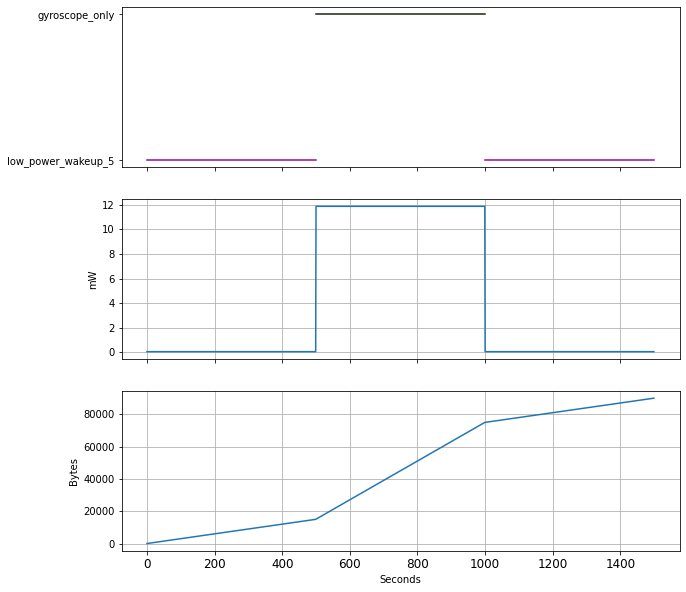

1

In [2]:
active_times = [(0,500,"low_power_wakeup_5"), (500,1000,"gyroscope_only"), (1000,1500,"low_power_wakeup_5")]
accel.runSim(active_times)

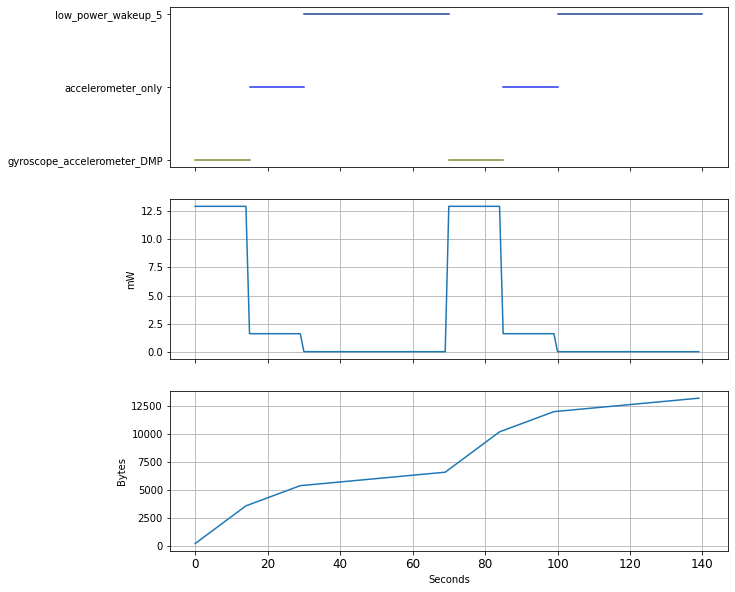

1

In [3]:
def generateActiveList(total_time: float, modedict:dict, **kwargs) -> list:
    #frequency should be in hz. duration should be in seconds
    #period = kwargs[period]
    finalArr = []
    curTime = 0
    while curTime < total_time:
        for i in modedict:
            finalArr.append((curTime, curTime+modedict[i], i))
            curTime+= modedict[i]
    # lastTuple = finalArr[-1]        
    # if lastTuple[1] > total_time:
    #     finalArr[-1] = (lastTuple[0],total_time,lastTuple[2])
    
    #print(finalArr)
    return finalArr
modedict = {"gyroscope_accelerometer_DMP":15, "accelerometer_only":15,"low_power_wakeup_5":40}
active_times = generateActiveList(total_time=80, modedict=modedict)
accel2 = MPU6050(time_step=1, duration=140, loop_rate=20, digital_low_pass=0, sample_rate_divisor=0)

accel2.runSim(active_times)
#mode_params = ('<modeName>', <period between starts>, <duration of measurement>, <start offset>)

#generateActiveList(3600, 'mode1', 30, 5, 0,'mode2',60,5,5)
#generateActiveList(total_time=3600, period=60, mode1=[], mode2=[])
#returns [(0,5,mode1),(5,10,'standby'),(10,15,'mode2'),(15,30,'standby'),(30,35,'mode1)........]



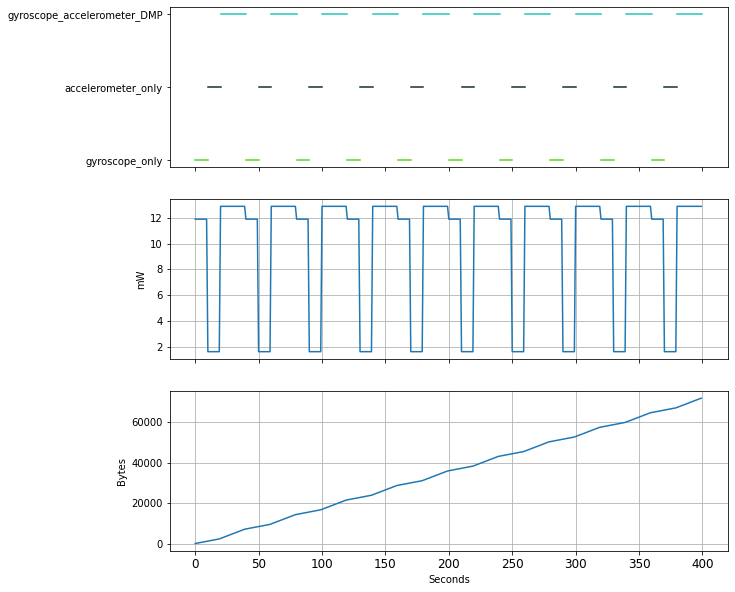

1

In [4]:
modedict = {"gyroscope_only":10, "accelerometer_only":10,"gyroscope_accelerometer_DMP":20}
active_times3 = generateActiveList(total_time=400, modedict=modedict)
accel3 = MPU6050(time_step=1, duration=400, loop_rate=20, digital_low_pass=0, sample_rate_divisor=0)

accel3.runSim(active_times3)